In [18]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image
from tqdm import tqdm

from netCDF4 import Dataset

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [2]:
# 2*2.5

FILEDIR1 = '/n/home12/hongwei/HONGWEI/merra2_2x25_standard/'
NcFile1   = Dataset(FILEDIR1+'/GEOSChem.SpeciesConc_inst.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]
EU1              = NcFile1.variables['SpeciesConc_PASV_EU']
LA1              = NcFile1.variables['SpeciesConc_PASV_LA']

GC_AREA1 = NcFile1.variables['AREA']


# 4*5
FILEDIR2 = '/n/home12/hongwei/HONGWEI/merra2_4x5_standard/'
NcFile2   = Dataset(FILEDIR2+'/GEOSChem.SpeciesConc_inst.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]
EU2              = NcFile2.variables['SpeciesConc_PASV_EU']
LA2              = NcFile2.variables['SpeciesConc_PASV_LA']

GC_AREA2 = NcFile2.variables['AREA']


LA1,'',LA2

(<class 'netCDF4._netCDF4.Variable'>
 float32 SpeciesConc_PASV_LA(time, lev, lat, lon)
     long_name: Dry mixing ratio of species PASV_LA
     units: mol mol-1 dry
     _FillValue: -1e+31
     averaging_method: instantaneous
 unlimited dimensions: time
 current shape = (31, 72, 91, 144)
 filling off,
 '',
 <class 'netCDF4._netCDF4.Variable'>
 float32 SpeciesConc_PASV_LA(time, lev, lat, lon)
     long_name: Dry mixing ratio of species PASV_LA
     units: mol mol-1 dry
     _FillValue: -1e+31
     averaging_method: instantaneous
 unlimited dimensions: time
 current shape = (31, 72, 46, 72)
 filling off)

In [3]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------

AD_file1 = open(FILEDIR1+'State_Met_AD_backup.txt','r')

GC_AD1 = EU1[0,:,:,:]*0.0

Nx1 = len(EU1[0,0,0,:])
Ny1 = len(EU1[0,0,:,0])
Nz1 = len(EU1[0,:,0,0])
Nt1 = len(EU1[:,0,0,0])

for ix in range(Nx1):
    for iy in range(Ny1):
        for iz in range(Nz1):
            line = AD_file1.readline()
            GC_AD1[iz,iy,ix] = float(line)
            
            
AD_file2 = open(FILEDIR2+'State_Met_AD_backup.txt','r')

GC_AD2 = EU2[0,:,:,:]*0.0

Nx2 = len(EU2[0,0,0,:])
Ny2 = len(EU2[0,0,:,0])
Nz2 = len(EU2[0,:,0,0])
Nt2 = len(EU2[:,0,0,0])

for ix in range(Nx2):
    for iy in range(Ny2):
        for iz in range(Nz2):
            line = AD_file2.readline()
            GC_AD2[iz,iy,ix] = float(line)

In [4]:
### change unit, do average

EU1_molec = EU1[:,:,:,:]*0.0
for i in range(Nt1):
    EU1_molec[i,:,:,:] = EU1[i,:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU1_Zsum = np.sum(EU1_molec[:,:,:,:], axis=1)
for i in range(Nt1):
    EU1_Zsum[i,:,:] = EU1_Zsum[i,:,:]/GC_AREA1[:,:]/1e4 # [molec/cm2]

EU1_Zsum_Xmean = np.mean(EU1_Zsum[:,:,:], axis=2)



LA1_molec = LA1[:,:,:,:]*0.0
for i in range(Nt1):
    LA1_molec[i,:,:,:] = LA1[i,:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA


LA1_Zsum = np.sum(LA1_molec[:,:,:,:], axis=1)
for i in range(Nt1):
    LA1_Zsum[i,:,:]   = LA1_Zsum[i,:,:]/GC_AREA1[:,:]/1e4

LA1_Zsum_Xmean = np.mean(LA1_Zsum[:,:,:], axis=2)


In [5]:
EU2_molec = EU2[:,:,:,:]*0.0
for i in range(Nt2):
    EU2_molec[i,:,:,:] = EU2[i,:,:,:]*(GC_AD2[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU2_Zsum = np.sum(EU2_molec[:,:,:,:], axis=1)
for i in range(Nt2):
    EU2_Zsum[i,:,:] = EU2_Zsum[i,:,:]/GC_AREA2[:,:]/1e4 # [molec/cm2]

EU2_Zsum_Xmean = np.mean(EU2_Zsum[:,:,:], axis=2)



LA2_molec = LA2[:,:,:,:]*0.0
for i in range(Nt2):
    LA2_molec[i,:,:,:] = LA2[i,:,:,:]*(GC_AD2[:,:,:]*1000.0/28.97)*NA


LA2_Zsum = np.sum(LA2_molec[:,:,:,:], axis=1)
for i in range(Nt2):
    LA2_Zsum[i,:,:]   = LA2_Zsum[i,:,:]/GC_AREA2[:,:]/1e4

LA2_Zsum_Xmean = np.mean(LA2_Zsum[:,:,:], axis=2)

In [6]:
# delete original variable to save memory
del EU1, LA1, EU2, LA2

Total mass [molec] in the end: 
GEOS-Chem         = 1.0780345506983632e+32
plume model 2*2.5 = 1.0771225370600459e+32
plume model 4*5   = 1.0774816363855042e+32


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

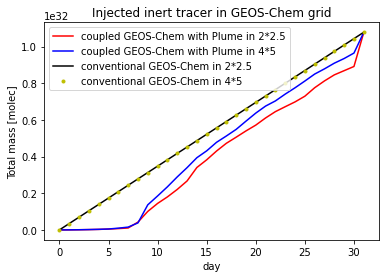

In [7]:


t = Nt1-1
print(f'Total mass [molec] in the end: ')
print(f'GEOS-Chem         = {np.sum(EU1_molec[t,:,:,:])}')
print(f'plume model 2*2.5 = {np.sum(LA1_molec[t,:,:,:])}')
print(f'plume model 4*5   = {np.sum(LA2_molec[t,:,:,:])}')

LA1_mass = [0]
LA2_mass = [0]
EU1_mass = [0]
EU2_mass = [0]
days = [0]

for i in range(Nt1):
    days.append(i+1)
    LA1_mass.append(np.sum(LA1_molec[i,:,:,:]))
    LA2_mass.append(np.sum(LA2_molec[i,:,:,:]))
    EU1_mass.append(np.sum(EU1_molec[i,:,:,:]))
    EU2_mass.append(np.sum(EU2_molec[i,:,:,:]))

plt.plot(days, LA1_mass, 'r', label='coupled GEOS-Chem with Plume in 2*2.5');
plt.plot(days, LA2_mass, 'b', label='coupled GEOS-Chem with Plume in 4*5');

plt.plot(days, EU1_mass, 'k', label='conventional GEOS-Chem in 2*2.5');
plt.plot(days, EU2_mass, 'y.', label='conventional GEOS-Chem in 4*5');

plt.title('Injected inert tracer in GEOS-Chem grid');
plt.xlabel('day');
plt.ylabel('Total mass [molec]');
plt.legend();

days

In [23]:
# plot  -----------------------------------------
#------------------------------------------------

# time step for ploting is 24 hours (once every day)
print(Nt1)

X_max = np.max(LA1_Zsum_Xmean[:,:],axis=(0,1)) # 16.5e+11;

i=0
for i in tqdm(np.arange(0,Nt1,1)):
    fig = plt.figure(figsize=(16,8));
#     gs = fig.add_gridspec(15, 8)
    plt.suptitle('Day: '+str(i+1), fontsize=16);
    
    
    
    # (1) for Lagrange ============================================================
    projection=ccrs.PlateCarree()
    ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree());
    ax1.set_global()
    
    ax1.gridlines(x_inline=True)    
    ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
    ax1.set_yticks(np.linspace(-90, 90, 7), crs=projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    

#     z = ma.masked_where(LA_Zsum[i,:,:] <= 1e-10, LA_Zsum[i,:,:])

    levels = [0.01e12, 0.05e12, 0.1e12, 0.5e12, 1e12, 5e12, 10e12]
    levels = np.array(levels)*10
    norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)
    
    data = LA1_Zsum[i,:,:]
    cyclic_data = add_cyclic_point(data)
    data, lon1_cyclic = add_cyclic_point(data, coord=lon1)
    
    ax1_contours = ax1.contourf(lon1_cyclic, lat1, data, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("Reds"), extend="max");
    
    cb1 = plt.colorbar(ax1_contours, ax=ax1)
    cb1.ax.tick_params(labelsize=11)
    cb1.set_label('[molec/cm2]')
    
    ax1.coastlines();
    ax1.set_title('Lagrangian (2*2.5)', fontsize=11);


    
    # (2) for Lagrange Distribution: ==============================================
    ax2 = plt.subplot(2,2,2);
    
    ax2.plot(LA1_Zsum_Xmean[i,:], lat1, 'r-', label='Lagrange: 2*2.5');
    ax2.plot(LA2_Zsum_Xmean[i,:], lat2, 'b--', label='Lagrange: 4*5');
    
    ax2.plot(EU1_Zsum_Xmean[i,:], lat1, color='gray', linestyle='-', alpha=0.7, label='Eulerian: 2*2.5');
    ax2.plot(EU2_Zsum_Xmean[i,:], lat2, color='gray', linestyle='--',  alpha=0.7, label='Eulerian: 4*5');

    
    ax2.set_xlim(0,X_max);
    ax2.set_ylim(-90,90);
    ax2.set_ylabel('Latitude (deg)');
    ax2.tick_params(axis='x', labelsize=11)  # to Set Matplotlib Tick Labels Font Size
    ax2.tick_params(axis='y', labelsize=11)
    ax2.legend();
    ax2.set_title('Lagrangian', fontsize=11);
    
    
    
     # (3) for EU ==================================================================
    ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree());
    ax3.set_global()
    
    ax3.gridlines(x_inline=True)    
    ax3.set_xticks(np.linspace(-180, 180, 7), crs=projection)
    ax3.set_yticks(np.linspace(-90, 90, 7), crs=projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax3.xaxis.set_major_formatter(lon_formatter)
    ax3.yaxis.set_major_formatter(lat_formatter)
    
#     z = ma.masked_where(EU_Zsum[i,:,:] <= 1e-5, EU_Zsum[i,:,:])
    data = EU1_Zsum[i,:,:]
    cyclic_data = add_cyclic_point(data)
    data, lon1_cyclic = add_cyclic_point(data, coord=lon1)
    
    ax3_contours = ax3.contourf(lon1_cyclic, lat1, data, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("Reds"), extend="max");


    cb3 = plt.colorbar(ax3_contours, ax=ax3)
    cb3.ax.tick_params(labelsize=11)
    cb3.set_label('[molec/cm2]')
    
    ax3.coastlines();
    ax3.set_title('Eulerian (2*2.5)', fontsize=11);
    
    
    
    # (4) for GOES distribution ===================================================
    
    ax4 = plt.subplot(2,2,4);
    
    ax4.plot(EU1_Zsum_Xmean[i,:], lat1, 'r-', label='Eulerian: 2*2.5');
    ax4.plot(EU2_Zsum_Xmean[i,:], lat2, 'b--', label='Eulerian: 4*5');

    ax4.plot(LA1_Zsum_Xmean[i,:], lat1, color='gray', linestyle='-', alpha=0.7, label='Lagrangian: 2*2.5');
    ax4.plot(LA2_Zsum_Xmean[i,:], lat2, color='gray', linestyle='--', alpha=0.7, label='Lagrangian: 4*5');
    
    
    ax4.set_xlim(0,X_max);
    ax4.set_ylim(-90,90);
    ax4.set_xlabel('Tracer Concentration [molec/cm2]');
    ax4.set_ylabel('Latitude (deg)');
    ax4.tick_params(axis='x', labelsize=11)  # to Set Matplotlib Tick Labels Font Size
    ax4.tick_params(axis='y', labelsize=11)
    ax4.legend()
    ax4.set_title('Eulerian', fontsize=11);
    
    
    plt.tight_layout()
    plt.savefig(str(i+1)+'_xy2.png', transparent=False, facecolor='w', edgecolor='w');
    plt.close();
    plt.clf();
    plt.cla();
        
plt.close();

  0%|          | 0/31 [00:00<?, ?it/s]

31
0


  3%|▎         | 1/31 [00:00<00:27,  1.10it/s]

1


  6%|▋         | 2/31 [00:01<00:25,  1.12it/s]

2


 10%|▉         | 3/31 [00:02<00:24,  1.12it/s]

3


 13%|█▎        | 4/31 [00:03<00:24,  1.09it/s]

4


 16%|█▌        | 5/31 [00:04<00:23,  1.10it/s]

5


 19%|█▉        | 6/31 [00:05<00:22,  1.11it/s]

6


 23%|██▎       | 7/31 [00:06<00:21,  1.12it/s]

7


 26%|██▌       | 8/31 [00:07<00:21,  1.08it/s]

8


 29%|██▉       | 9/31 [00:08<00:20,  1.09it/s]

9


 32%|███▏      | 10/31 [00:09<00:19,  1.10it/s]

10


 35%|███▌      | 11/31 [00:10<00:18,  1.06it/s]

11


 39%|███▊      | 12/31 [00:10<00:17,  1.08it/s]

12


 42%|████▏     | 13/31 [00:11<00:16,  1.09it/s]

13


 45%|████▌     | 14/31 [00:12<00:15,  1.10it/s]

14


 48%|████▊     | 15/31 [00:13<00:15,  1.04it/s]

15


 52%|█████▏    | 16/31 [00:14<00:14,  1.07it/s]

16


 55%|█████▍    | 17/31 [00:15<00:12,  1.08it/s]

17


 58%|█████▊    | 18/31 [00:16<00:11,  1.09it/s]

18


 61%|██████▏   | 19/31 [00:17<00:10,  1.10it/s]

19


 65%|██████▍   | 20/31 [00:18<00:10,  1.04it/s]

20


 68%|██████▊   | 21/31 [00:19<00:09,  1.06it/s]

21


 71%|███████   | 22/31 [00:20<00:08,  1.07it/s]

22


 74%|███████▍  | 23/31 [00:21<00:07,  1.08it/s]

23


 77%|███████▋  | 24/31 [00:22<00:06,  1.09it/s]

24


 81%|████████  | 25/31 [00:23<00:05,  1.02it/s]

25


 84%|████████▍ | 26/31 [00:24<00:04,  1.04it/s]

26


 87%|████████▋ | 27/31 [00:25<00:03,  1.06it/s]

27


 90%|█████████ | 28/31 [00:25<00:02,  1.07it/s]

28


 94%|█████████▎| 29/31 [00:26<00:01,  1.08it/s]

29


 97%|█████████▋| 30/31 [00:27<00:00,  1.09it/s]

30


100%|██████████| 31/31 [00:28<00:00,  1.08it/s]


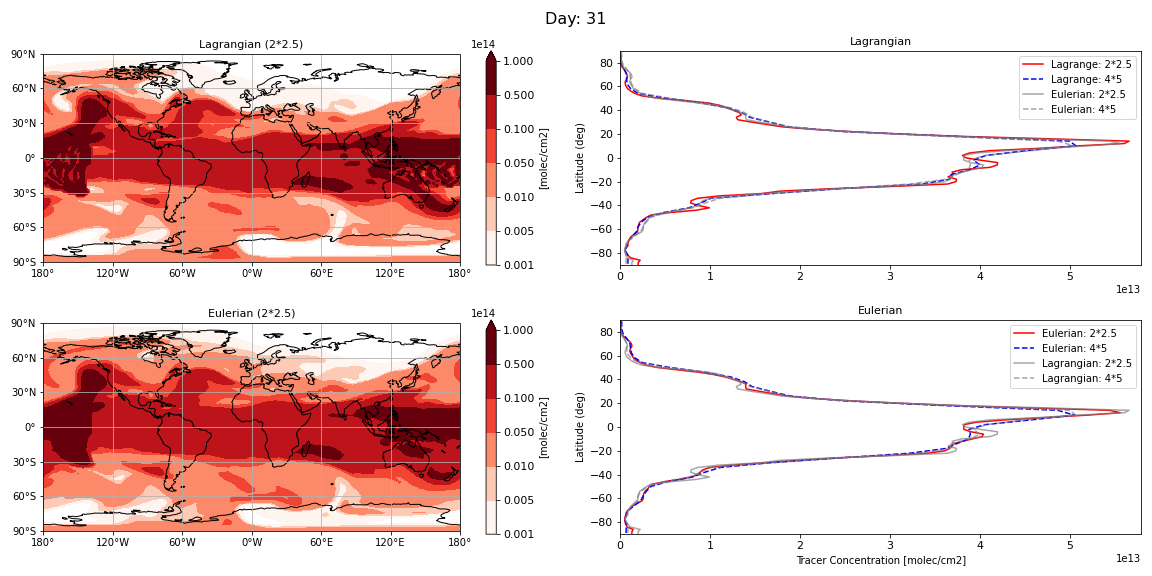

In [22]:
Image(filename=f'{Nt1}_xy2.png') 

In [9]:
os.system("./png2gif2.sh")

0

In [10]:
# calculate the average and std for the curves at last time step

time = Nt1-1

# LA1_Zsum_Xmean[time,:]
# LA2_Zsum_Xmean[time,:]

# EU1_Zsum_Xmean[time,:]
# EU2_Zsum_Xmean[time,:]

LA1_mean = np.mean(LA1_Zsum_Xmean[time,:])
LA1_std = np.std(LA1_Zsum_Xmean[time,:])

LA2_mean = np.mean(LA2_Zsum_Xmean[time,:])
LA2_std = np.std(LA2_Zsum_Xmean[time,:])

EU1_mean = np.mean(EU1_Zsum_Xmean[time,:])
EU1_std = np.std(EU1_Zsum_Xmean[time,:])

EU2_mean = np.mean(EU2_Zsum_Xmean[time,:])
EU2_std = np.std(EU2_Zsum_Xmean[time,:])

In [11]:
LA1_mean, LA1_std

(14465963725430.154, 16659546476534.467)

In [12]:
LA2_mean, LA2_std

(14301798290140.133, 16358390550016.844)

In [13]:
EU1_mean, EU1_std

(14497429813495.56, 16444030170871.246)

In [14]:
EU2_mean, EU2_std

(14371228429445.564, 16084378371554.979)